## Laden der Daten

In [30]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
sns.set_theme()

df_lib_usage = pd.read_csv('../data/Library_Usage.csv', low_memory=False, na_values='Null')

## Umgang mit fehlenden Werten

In [33]:
df_lib_usage.isna().sum()

Patron Type Definition              0
Total Checkouts                     0
Total Renewals                      0
Age Range                         510
Home Library Definition            30
Circulation Active Month        40317
Circulation Active Year         40317
Notice Preference Definition     3315
Provided Email Address              0
Year Patron Registered              0
Within San Francisco County       221
dtype: int64

### Genauere Ansicht der fehlenden Werte nach Kundentypen

In [36]:
df_no_age = df_lib_usage[df_lib_usage['Age Range'].isna()]

In [38]:
df_no_age['Patron Type Definition'].value_counts()

Patron Type Definition
Teacher Card           223
Adult                  114
Retired Staff           74
Digital Access Card     51
Senior                  20
Teen                     8
Welcome                  7
Juvenile                 6
Business                 6
At User Adult            1
Name: count, dtype: int64

Modus: Retired Staff

In [41]:
df_retired = df_lib_usage[df_lib_usage['Patron Type Definition'] == 'Retired Staff']

In [43]:
df_retired['Age Range'].value_counts()

Age Range
65 to 74 years       76
75 years and over    38
60 to 64 years       13
55 to 59 years        9
25 to 34 years        1
Name: count, dtype: int64

In [45]:
df_retired = df_lib_usage[df_lib_usage['Patron Type Definition'] == 'Retired Staff']
retired_age_mode = df_retired['Age Range'].mode()
print(retired_age_mode)
print(retired_age_mode.values[0])
print(type(retired_age_mode.values[0]))

0    65 to 74 years
Name: Age Range, dtype: object
65 to 74 years
<class 'str'>


Modus: Sonstige Kundentypen

In [18]:
teacher_age_mode = df_lib_usage[df_lib_usage['Patron Type Definition'] == 'Teacher Card']['Age Range'].mode()
adult_age_mode = df_lib_usage[df_lib_usage['Patron Type Definition'] == 'Adult']['Age Range'].mode()
senior_age_mode = df_lib_usage[df_lib_usage['Patron Type Definition'] == 'Senior']['Age Range'].mode()
teen_age_mode = df_lib_usage[df_lib_usage['Patron Type Definition'] == 'Teen']['Age Range'].mode()
welcome_age_mode = df_lib_usage[df_lib_usage['Patron Type Definition'] == 'Welcome']['Age Range'].mode()
juvenile_age_mode = df_lib_usage[df_lib_usage['Patron Type Definition'] == 'Juvenile']['Age Range'].mode()
business_age_mode = df_lib_usage[df_lib_usage['Patron Type Definition'] == 'Business']['Age Range'].mode()
at_user_age_mode = df_lib_usage[df_lib_usage['Patron Type Definition'] == 'At User Adult']['Age Range'].mode()

Versuch: zunächst bei "Retired Staff" fehlenden "Age Range" durch Modus des Patron Types zu ersetzen
Bislang misslungen, deshalb nicht weiter ausgebaut

In [22]:
def set_age_mode(local_row):
    if local_row['Patron Type Definition'] == 'Retired Staff':
        #print('Retired')
        if pd.isna(local_row['Age Range']):
            #print(type(retired_age_mode.values[0]))
            #print(f'return{retired_age_mode.values[0]}')
            return retired_age_mode.values[0]
    else:
        #print(local_row['Age Range'])
        return local_row['Age Range']
    

In [24]:
df_lib_usage['Age Range Modified'] = df_lib_usage.apply(lambda row: set_age_mode(row), axis=1)

In [25]:
df_lib_usage.isna().sum()

Patron Type Definition              0
Total Checkouts                     0
Total Renewals                      0
Age Range                         510
Home Library Definition            30
Circulation Active Month        40317
Circulation Active Year         40317
Notice Preference Definition     3315
Provided Email Address              0
Year Patron Registered              0
Within San Francisco County       221
Age Range Modified                573
dtype: int64

In [28]:
df_lib_usage[df_lib_usage['Age Range Modified'].isna()]

,Patron Type Definition,Total Checkouts,Total Renewals,Age Range,Home Library Definition,Circulation Active Month,Circulation Active Year,Notice Preference Definition,Provided Email Address,Year Patron Registered,Within San Francisco County,Age Range Modified
2010,Adult,0,0,NaN,Main,May,2021.0,Email,True,2017,False,NaN
2999,Retired Staff,2325,1203,65 to 74 years,Main,Mar,2024.0,Email,True,2003,False,None
3603,Digital Access Card,0,0,NaN,Main,Mar,2024.0,Email,True,2019,False,NaN
5212,Adult,5,4,NaN,Main,Mar,2024.0,Email,True,2022,False,NaN
5523,Adult,0,0,NaN,Main,Feb,2024.0,Email,True,2023,False,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
450329,Digital Access Card,0,0,NaN,Glen Park,Aug,2022.0,Print,False,2022,NaN,NaN
450331,Digital Access Card,0,0,NaN,Glen Park,Oct,2021.0,Print,False,2021,NaN,NaN
450333,Digital Access Card,0,0,NaN,Glen Park,Aug,2021.0,Print,False,2021,NaN,NaN
450336,Digital Access Card,0,0,NaN,Bernal Heights,Nov,2023.0,Email,True,2023,NaN,NaN


## Vorbereitung: Ausgabe der absoluten Nutzerzahlen nach Altersgruppe

Absolute Anzahl an aktiven Kund:innen nach Altersgruppen

In [18]:
df_lib_usage['Age Range'].value_counts().sort_index()

0 to 9 years         33180
10 to 19 years       67758
20 to 24 years       27145
25 to 34 years       95278
35 to 44 years       85669
45 to 54 years       49820
55 to 59 years       19735
60 to 64 years       18088
65 to 74 years       32455
75 years and over    20721
Name: Age Range, dtype: int64

Vorbereitung der Sortierung in der Ausgabe

In [19]:
age_range_groups = df_lib_usage['Age Range'].unique()

In [20]:
age_range_groups = age_range_groups[:-1]

In [21]:
age_range_groups.sort()

Ausgabe als Balkendiagramm

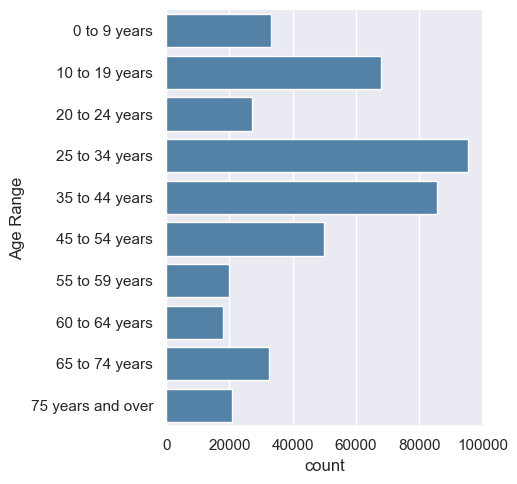

In [22]:
sns.catplot(y='Age Range', 
            data=df_lib_usage, kind='count', color="steelblue", order = age_range_groups)

## Wie ist die Altersgruppenverteilung in verschiedenen Bibliotheksfilialen?

In [23]:
df_lib_usage['Home Library Definition'].value_counts()

Main                  145932
Richmond               21433
Mission                18424
Mission Bay            16942
Ortega                 15935
Sunset                 14829
Excelsior              13587
Eureka Valley          12960
Chinatown              12452
Park                   12295
Marina                 11923
Bernal Heights         11381
West Portal            11008
Noe Valley             11002
Presidio               10981
North Beach            10896
Potrero                10551
Merced                 10442
Anza                    9319
Western Addition        9117
Parkside                9069
Ingleside               8917
Glen Park               8471
Golden Gate Valley      7378
Portola                 7036
Bayview                 6726
Visitacion Valley       5527
Ocean View              3673
Bookmobile              2123
Name: Home Library Definition, dtype: int64

In [24]:
pd.crosstab(
    df_lib_usage['Home Library Definition'],
    df_lib_usage['Age Range'],
    margins=True, normalize=0, 
)

Age Range,0 to 9 years,10 to 19 years,20 to 24 years,25 to 34 years,35 to 44 years,45 to 54 years,55 to 59 years,60 to 64 years,65 to 74 years,75 years and over
Home Library Definition,,,,,,,,,,
Anza,0.058508,0.143103,0.066023,0.199034,0.189909,0.116264,0.048631,0.039828,0.084702,0.053999
Bayview,0.082143,0.283631,0.078125,0.151042,0.151637,0.090923,0.041667,0.041071,0.057887,0.021875
Bernal Heights,0.092084,0.214864,0.039842,0.151539,0.193228,0.121196,0.046262,0.034653,0.066139,0.040193
Bookmobile,0.096835,0.165328,0.050071,0.166745,0.144544,0.087388,0.045347,0.037789,0.064242,0.141710
Chinatown,0.035430,0.204949,0.081947,0.185426,0.155459,0.100667,0.039287,0.041456,0.095766,0.059613
Eureka Valley,0.040982,0.105966,0.044378,0.247665,0.213398,0.129274,0.055028,0.047542,0.072702,0.043066
Excelsior,0.082112,0.312026,0.080566,0.139480,0.125709,0.085500,0.036011,0.035791,0.062228,0.040577
Glen Park,0.061369,0.155374,0.043278,0.128651,0.188719,0.149225,0.056166,0.053683,0.098380,0.065153
Golden Gate Valley,0.050169,0.069424,0.047593,0.319593,0.211797,0.088000,0.043254,0.034034,0.070915,0.065220


<AxesSubplot:xlabel='Proportion', ylabel='Home Library Definition'>

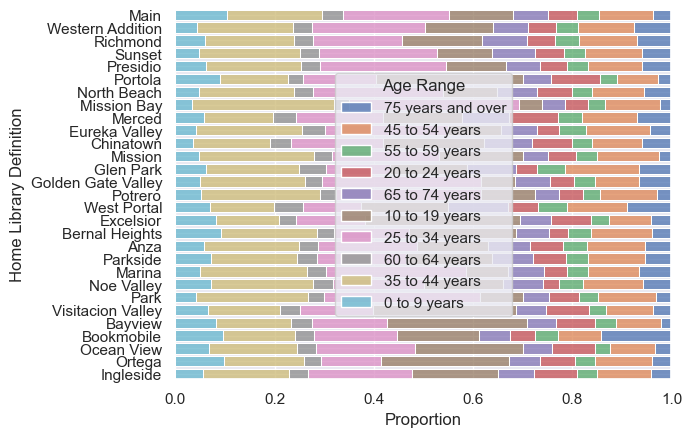

In [25]:
sns.histplot(
    data=df_lib_usage,
    y="Home Library Definition", hue="Age Range",
    multiple="fill", stat="proportion",
    discrete=True, shrink=.8
)

#sns.catplot(y='Home Library Definition', hue='Age Range',
   #         data=df_lib_usage, kind='count', color="steelblue", stacked=True)